In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from random import choice
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')
sns.set() #применение более красивых графиков seaborn 

pd.set_option('display.max_rows', 100) # показывать больше строк
pd.set_option('display.max_columns', 100) # показывать больше колонок
%matplotlib inline
stud_math = pd.read_csv('stud_math.csv')

In [2]:
display (stud_math.sample(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
281,GP,M,17,U,LE3,A,3.0,NaN,teacher,services,home,mother,1.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,4.0,3.0,19.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
342,GP,M,18,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,NaN,11.0,75.0
330,GP,M,18,U,LE3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,NaN,4.0,5.0,5.0,NaN,2.0,40.0


In [3]:
stud_math.columns = stud_math.columns.str.lower()

In [4]:
display (stud_math.shape) 
display (stud_math.info())
no_data = stud_math.isna().sum().reset_index().sort_values(by = 0,ascending=False) # смотрим кол-во пустых значений по столбцам
display(no_data)

(395, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,index,0
5,pstatus,45
17,paid,40
16,famsup,39
9,fjob,36
22,internet,34
23,romantic,31
11,guardian,31
12,traveltime,28
24,famrel,27
4,famsize,27


In [5]:
stud_math.describe(include=[object])


,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [6]:
stud_math.describe(include=[int,float])


,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


1. В таблице 395 записей, что соответствует 395 студентам 
2. Таблица содержит 30 столбцов (в описании массива дано 29 столбцов)
3. По содержанию: 
    - 13 столбцов содержат числовые переменные (1 - целочисленные, 12 - с десятичной частью)
    - 17 столбцов являются строками  
4. В score отсутствует 6 значений

In [7]:
# Удаление колонки studytime, granular - ее описание отсутствует
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

In [8]:
# Просмотр строк с пустыми значениями из ключевого столбца score
stud_math[stud_math['score'].isnull()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [9]:
# Поскольку мы изучаем влияние условий жизни на оценку по математике (score) имеет смысл удалить пустые значения в столбце score.
# Мы не можем проанализировать влияние на отсутствующие данные
stud_math = stud_math[~stud_math['score'].isnull()]

## Разберем DataFrame по столбцам

In [10]:
#pre-function 

'''смотрим на: количество уникальных значений в столбце, 
             частоту встречаний значений, 
             info() про столбец, 
             стат.данные для номинативных значений (count, unique, top, freq),
             график частоты встречающихся значений, 
             если есть порпущенные значения - количество таких записей,
             таблицу всех записей с пропущенными значениями'''

def basic_analysis(column):
    print('Столбец ', column)
    print('--------------')
    print (f'Кол-во уникальных значений {stud_math[column].nunique()}')
    display(stud_math[column].value_counts()) 
    print (f'В колонке всего {stud_math[column].value_counts().sum()} значений')
    print(f'В колонке всего {stud_math[column].isna().sum()} пропущенных значений')
    if stud_math[column].dtypes == 'object': #Выделяем номинативные переменные
        display(stud_math[column].describe(include=[object]))
        sns.countplot(stud_math[column])
    else: #Выделяем числовые переменные
        stud_math[column].value_counts()
        display(stud_math[column].describe())
        sns.countplot(x=column, data=stud_math)
        plt.show()
    string_with_nan = stud_math.loc[stud_math[column].isna()]
    display(string_with_nan)

  
''' Смотрим на выбросы по столбцу'''    
def data_adjustment (column):
    q1 = stud_math[column].quantile(0.25)
    q3 = stud_math[column].quantile(0.75)
    IQR = q3 - q1   
    print('---------------------------')
    print('Границы выбросов: ', q1-1.5*IQR, ', ', q3+1.5*IQR)
    print('---------------------------')    
    low_bound = (stud_math[stud_math[column] < (q1 - 1.5*IQR)])
    high_bound = (stud_math[stud_math[column] > (q3 + 1.5*IQR)])
    if len(low_bound)+len(high_bound) > 0:       
        print('---------------------------')
        print('Количество выбросов в столбце', (len(low_bound)+len(high_bound)))
        print('---------------------------')         
        if len(low_bound) > 0:
            print('\n','Выбросы по нижней границе') 
            display(low_bound)
        elif len(high_bound) > 0:
            print('\n','Выбросы по верхней границе')
            display(high_bound)
            

''' Заменим NaN на  случайное значение'''            
def replace_nan_by_random_value(column):
    values = list(stud_math[column].value_counts().index)
    stud_math[column] = stud_math[column].apply(lambda x: rnd.choice(values) if pd.isna(x) else x)
    basic_analysis(column)
    
    
''' Заменим NaN на  моду'''      
def replace_nan_by_mode(column):
    stud_math[column].fillna(stud_math[column].mode()[0], inplace=True)
    basic_analysis(column)

    
''' Заменим NaN на медиану'''      
def replace_nan_by_median(column):
    stud_math[column].fillna(stud_math[column].median(), inplace=True)
    basic_analysis(column)

## Как мы видим из описания stud_math - колонки  school, sex, age не имеют пропусков, посмотрим на них в первую очередь

Столбец  school
--------------
Кол-во уникальных значений 2


GP    344
MS     45
Name: school, dtype: int64

В колонке всего 389 значений
В колонке всего 0 пропущенных значений


count     389
unique      2
top        GP
freq      344
Name: school, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


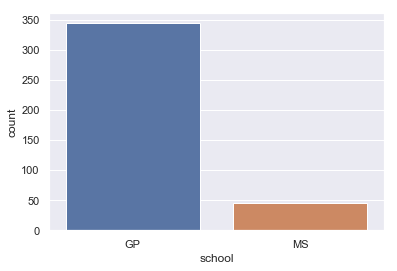

In [11]:
basic_analysis('school')

Столбец  sex
--------------
Кол-во уникальных значений 2


F    204
M    185
Name: sex, dtype: int64

В колонке всего 389 значений
В колонке всего 0 пропущенных значений


count     389
unique      2
top         F
freq      204
Name: sex, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


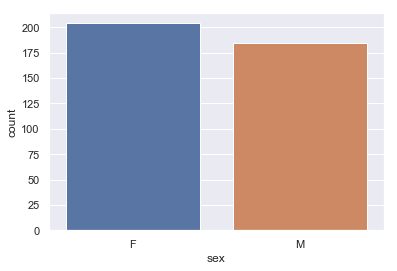

In [12]:
basic_analysis('sex')

Столбец  age
--------------
Кол-во уникальных значений 8


16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

В колонке всего 389 значений
В колонке всего 0 пропущенных значений


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

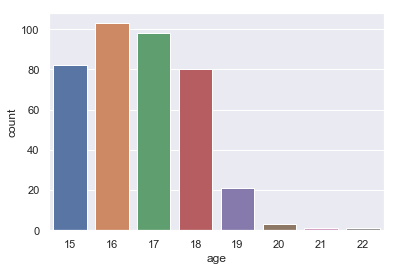

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [13]:
basic_analysis('age')

## Рассмотрим числовые столбцы в df : age, absences, score

Другие столбцы с числовыми значениями содержат описательную информацию - то есть в форме числа предаствлен признак. 

age - это одна из числовых переменных данного DF, проверим ее на выбросы

In [14]:
data_adjustment('age')

---------------------------
Границы выбросов:  13.0 ,  21.0
---------------------------
---------------------------
Количество выбросов в столбце 1
---------------------------

 Выбросы по верхней границе


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


In [15]:
# Присутствует выброс по верхней границе, удаляем его:
stud_math = stud_math.loc[stud_math.age <= 21]

Рассмотрим график распределения переменной age

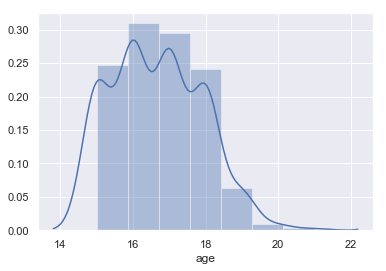

In [16]:
sns.distplot(stud_math.age, bins = 7)

Распределение визуально не похоже на нормальное, однако поскольку возраст - это целое подобные колебания на графике предсказуемы. Но возникают вопросы к методу формирования выборки.

Столбец  absences
--------------
Кол-во уникальных значений 36


0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

В колонке всего 377 значений
В колонке всего 11 пропущенных значений


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

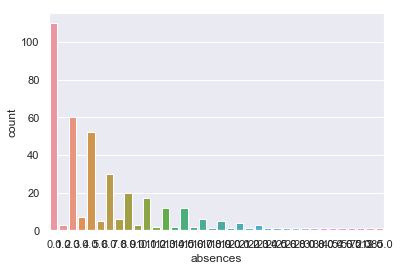

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


In [17]:
basic_analysis('absences')

Столбец  absences
--------------
Кол-во уникальных значений 36


0.0      110
4.0       63
2.0       60
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       7.203608
std       23.310671
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

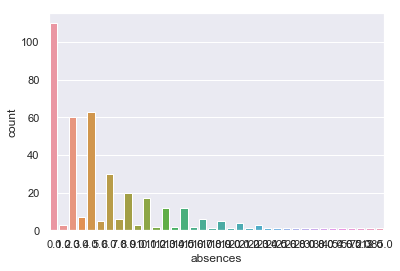

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [18]:
#Заменим пустые значения на медиану
replace_nan_by_median('absences')

In [19]:
data_adjustment('absences')

---------------------------
Границы выбросов:  -12.0 ,  20.0
---------------------------
---------------------------
Количество выбросов в столбце 17
---------------------------

 Выбросы по верхней границе


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


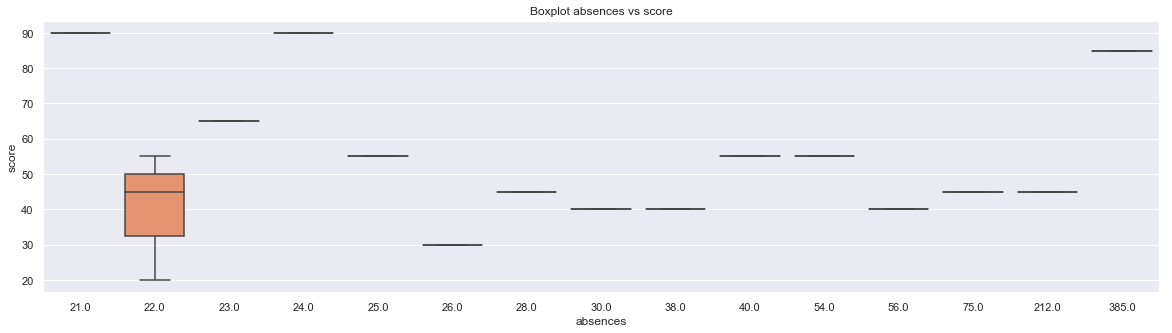

In [20]:
fig, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(x='absences',
            y='score',
            data=stud_math.loc[stud_math.absences > 20],
            ax=axes)
axes.set_title('Boxplot absences vs score')
plt.show()

17 выбросов это 4,4% выборки. Также 3 выброса по absence демонстрируют очень высокий балл по математике. Поэтому выбросы в данной ситуации лучше не удалять.

Столбец  score
--------------
Кол-во уникальных значений 18


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     30
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean      52.293814
std       22.940126
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

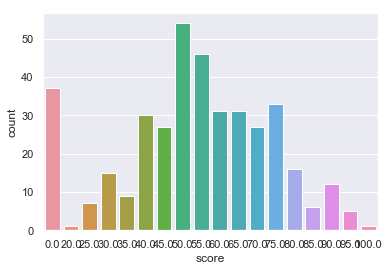

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [21]:
basic_analysis ('score')

In [22]:
data_adjustment('score')

---------------------------
Границы выбросов:  -5.0 ,  115.0
---------------------------


Таким бразом мы видим, что выбросы отсутствуют.

Рассмотрим график распределения переменной score

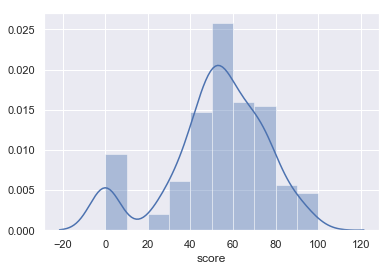

In [23]:
sns.distplot(stud_math.score, bins = 10)

На графике наблюдается бимодальное распределение. Как мы посмотрели выше значение 0 не является выбросом. 

Распределение близко к нормальному (по форму напоминает колокол)

## Рассмотрим остальные номинативные столбцы 

Столбец  address
--------------
Кол-во уникальных значений 2


U    290
R     83
Name: address, dtype: int64

В колонке всего 373 значений
В колонке всего 15 пропущенных значений


count     373
unique      2
top         U
freq      290
Name: address, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,4.0,60.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0


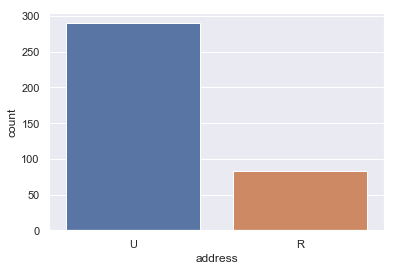

In [24]:
basic_analysis (stud_math.columns[3])

In [25]:
# проверим наличие связи между адресом и временем, которое тратиться на то, чтобы добраться до учебы
address_vs_traveltime = stud_math.groupby(by=['address', 'traveltime'])['address'].agg('count')
display(address_vs_traveltime)

address  traveltime
R        1.0            34
         2.0            26
         3.0            12
         4.0             4
U        1.0           197
         2.0            63
         3.0             9
         4.0             3
Name: address, dtype: int64

выборки с адресом R и U сильно различаются по количеству, в целом распределние значений traveltime одинако для R и U

Заполним 15 пропущенных значения по столбцу самым частовстречающимся значением (U)

In [26]:
stud_math['address'].fillna(stud_math['address'].value_counts().index[0], inplace = True)

Столбец  famsize
--------------
Кол-во уникальных значений 2


GT3    254
LE3    107
Name: famsize, dtype: int64

В колонке всего 361 значений
В колонке всего 27 пропущенных значений


count     361
unique      2
top       GT3
freq      254
Name: famsize, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,4.0,90.0


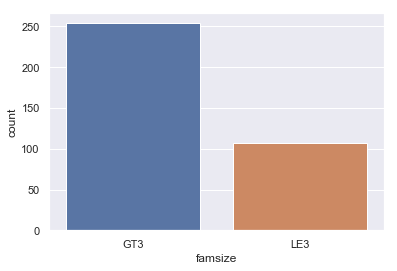

In [27]:
basic_analysis (stud_math.columns[4])

In [28]:
famsize_vs_guardian  = stud_math.groupby(by=['famsize', 'guardian'])['famsize'].agg('count')
display(famsize_vs_guardian)

famsize  guardian
GT3      father       59
         mother      154
         other        18
LE3      father       24
         mother       72
         other         5
Name: famsize, dtype: int64

В целом зависимость не прослеживается, заменим новым значения no_data

In [29]:
stud_math['famsize'].fillna('no_data', inplace = True)

Столбец  pstatus
--------------
Кол-во уникальных значений 2


T    307
A     36
Name: pstatus, dtype: int64

В колонке всего 343 значений
В колонке всего 45 пропущенных значений


count     343
unique      2
top         T
freq      307
Name: pstatus, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,no_data,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


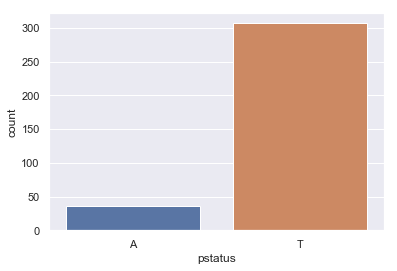

In [30]:
basic_analysis (stud_math.columns[5])

Заполним пропущенные значения pstatus значением no_data

In [31]:
stud_math['pstatus'].fillna('no_data', inplace = True)

Столбец  medu
--------------
Кол-во уникальных значений 5


4.0    131
2.0    100
3.0     95
1.0     56
0.0      3
Name: medu, dtype: int64

В колонке всего 385 значений
В колонке всего 3 пропущенных значений


count    385.000000
mean       2.766234
std        1.095637
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

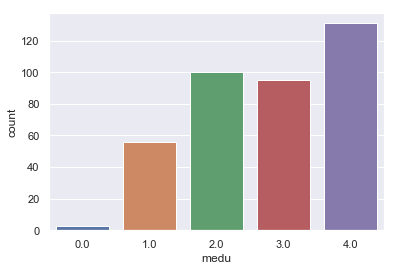

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,U,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,no_data,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,no_data,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [32]:
basic_analysis (stud_math.columns[6])

Рассмотрим столбец medu в связке со столбцом mjob, так как логично предположить, что образование имеет связь с работой

Столбец  mjob
--------------
Кол-во уникальных значений 5


other       127
services     97
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

В колонке всего 369 значений
В колонке всего 19 пропущенных значений


count       369
unique        5
top       other
freq        127
Name: mjob, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,no_data,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,no_data,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,no_data,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


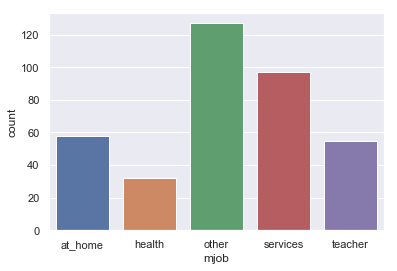

In [33]:
basic_analysis (stud_math.columns[8])

Значение medu заполним с учетом значений mjob: Для каждой работы найдем наиболее часто встречающееся образование.

In [34]:
stud_math.groupby('mjob')['medu'].value_counts()

mjob      medu
at_home   1.0     25
          2.0     21
          3.0      8
          0.0      2
          4.0      2
health    4.0     24
          3.0      5
          2.0      2
          1.0      1
other     2.0     43
          3.0     36
          1.0     23
          4.0     22
          0.0      1
services  3.0     37
          2.0     30
          4.0     24
          1.0      5
teacher   4.0     52
          3.0      3
Name: medu, dtype: int64

In [35]:
def fill_medu():
    stud_math.loc[(stud_math.medu.isna()) & (stud_math.mjob == 'at_home'), 'medu'] = 1
    stud_math.loc[(stud_math.medu.isna()) & (stud_math.mjob == 'health'), 'medu'] = 4
    stud_math.loc[(stud_math.medu.isna()) & (stud_math.mjob == 'other'), 'medu'] = 2
    stud_math.loc[(stud_math.medu.isna()) & (stud_math.mjob == 'services'), 'medu'] = 3
    stud_math.loc[(stud_math.medu.isna()) & (stud_math.mjob == 'teacher'), 'medu'] = 4

fill_medu()

Применим ту же логику к столбцу fedu 

Столбец  fedu
--------------
Кол-во уникальных значений 6


2.0     105
3.0      94
4.0      88
1.0      74
0.0       2
40.0      1
Name: fedu, dtype: int64

В колонке всего 364 значений
В колонке всего 24 пропущенных значений


count    364.000000
mean       2.631868
std        2.243245
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

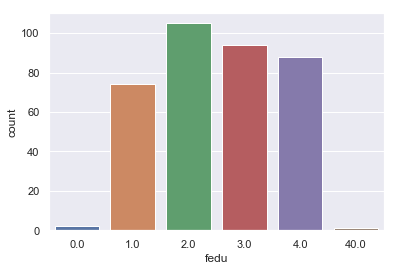

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,no_data,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [36]:
basic_analysis (stud_math.columns[7])

В столбце fedu есть неучтенное в описании значение = 40, считаем это ошибкой заполнения и заменяем на 4

In [37]:
stud_math.loc[stud_math.fedu == 40, 'fedu'] = 4


Столбец  fjob
--------------
Кол-во уникальных значений 5


other       194
services     98
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

В колонке всего 352 значений
В колонке всего 36 пропущенных значений


count       352
unique        5
top       other
freq        194
Name: fjob, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


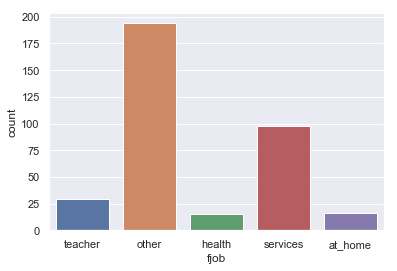

In [38]:
basic_analysis (stud_math.columns[9])

Значение fedu заполним с учетом значений fjob: Для каждой работы найдем наиболее часто встречающееся образование.

In [39]:
stud_math.groupby('fjob')['fedu'].value_counts()

fjob      fedu
at_home   2.0      6
          1.0      3
          3.0      3
          4.0      2
health    4.0      8
          3.0      3
          1.0      1
          2.0      1
other     2.0     58
          3.0     50
          1.0     46
          4.0     31
          0.0      2
services  3.0     30
          2.0     26
          1.0     17
          4.0     17
teacher   4.0     25
          3.0      1
Name: fedu, dtype: int64

In [40]:
def fill_fedu():
    stud_math.loc[(stud_math.fedu.isna()) & (stud_math.fjob == 'at_home'), 'fedu'] = 2
    stud_math.loc[(stud_math.fedu.isna()) & (stud_math.fjob == 'health'), 'fedu'] = 4
    stud_math.loc[(stud_math.fedu.isna()) & (stud_math.fjob == 'other'), 'fedu'] = 2
    stud_math.loc[(stud_math.fedu.isna()) & (stud_math.fjob == 'services'), 'fedu'] = 3
    stud_math.loc[(stud_math.fedu.isna()) & (stud_math.fjob == 'teacher'), 'fedu'] = 4

fill_medu()

Столбец  mjob
--------------
Кол-во уникальных значений 5


other       127
services     97
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

В колонке всего 369 значений
В колонке всего 19 пропущенных значений


count       369
unique        5
top       other
freq        127
Name: mjob, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,no_data,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,no_data,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,no_data,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


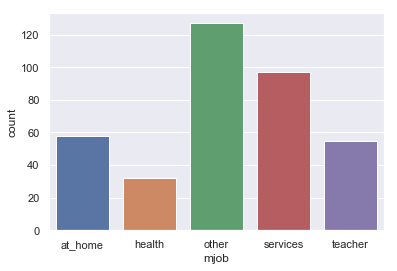

In [41]:
basic_analysis (stud_math.columns[8])

Заполним пропущенные значения в столбце mjob (работа матери) наиболее частотными для образования матери (medu) - other

In [42]:
stud_math.mjob.fillna('other', inplace=True)

Столбец  fjob
--------------
Кол-во уникальных значений 5


other       194
services     98
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

В колонке всего 352 значений
В колонке всего 36 пропущенных значений


count       352
unique        5
top       other
freq        194
Name: fjob, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


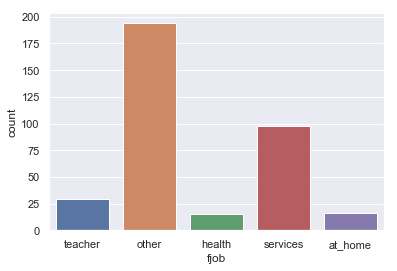

In [43]:
basic_analysis (stud_math.columns[9])

Заполним пропущенные значения в столбце fjob (работа отца) наиболее частотными для образования отца (fedu) - other

In [44]:
stud_math.mjob.fillna('other', inplace=True)

Столбец  reason
--------------
Кол-во уникальных значений 4


course        135
reputation    102
home          101
other          33
Name: reason, dtype: int64

В колонке всего 371 значений
В колонке всего 17 пропущенных значений


count        371
unique         4
top       course
freq         135
Name: reason, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,no_data,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,no_data,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,no_data,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0


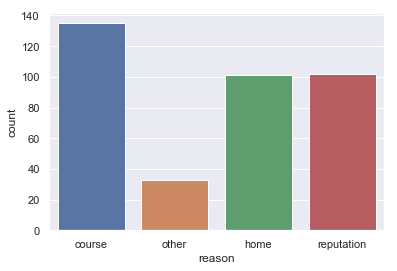

In [45]:
basic_analysis (stud_math.columns[10])

Заполним пропущенные значения случайным значением из списка

Столбец  reason
--------------
Кол-во уникальных значений 4


course        137
home          107
reputation    106
other          38
Name: reason, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count        388
unique         4
top       course
freq         137
Name: reason, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


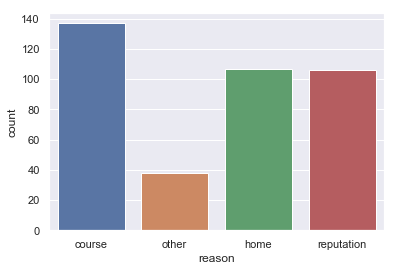

In [46]:
replace_nan_by_random_value('reason')

Столбец  guardian
--------------
Кол-во уникальных значений 3


mother    247
father     86
other      24
Name: guardian, dtype: int64

В колонке всего 357 значений
В колонке всего 31 пропущенных значений


count        357
unique         3
top       mother
freq         247
Name: guardian, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,no_data,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,other,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


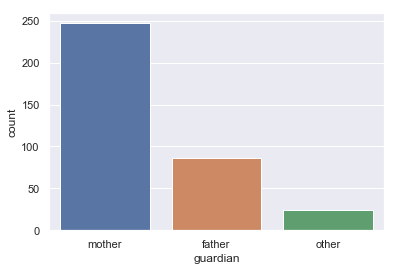

In [47]:
basic_analysis (stud_math.columns[11])

Заполним пропущенные значения наиболее часто встречающимся значением из списка

Столбец  guardian
--------------
Кол-во уникальных значений 3


mother    278
father     86
other      24
Name: guardian, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count        388
unique         3
top       mother
freq         278
Name: guardian, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


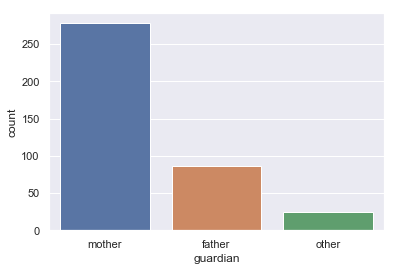

In [48]:
replace_nan_by_mode('guardian')

Столбец  traveltime
--------------
Кол-во уникальных значений 4


1.0    238
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

В колонке всего 360 значений
В колонке всего 28 пропущенных значений


count    360.000000
mean       1.436111
std        0.693243
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

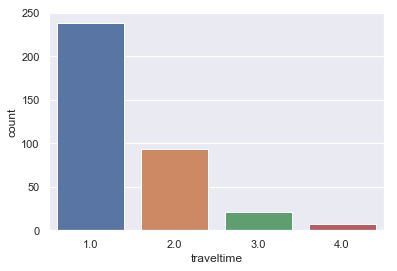

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,other,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,no_data,2.0,2.0,at_home,other,home,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [49]:
basic_analysis (stud_math.columns[12])

In [50]:
# проверим наличие связи между адресом и временем, которое тратиться на то, чтобы добраться до учебы
address_vs_traveltime = stud_math.groupby(by=['address', 'traveltime'])['address'].agg('count')
display(address_vs_traveltime)

address  traveltime
R        1.0            34
         2.0            26
         3.0            12
         4.0             4
U        1.0           204
         2.0            68
         3.0             9
         4.0             3
Name: address, dtype: int64

Связи между адресом и временем,  которое ученик тратит на дорогу в целом не связано.

Наиболее частовстречающимся значением является 1

Заполним пустые значения наиболее часто встречающимся

Столбец  traveltime
--------------
Кол-во уникальных значений 4


1.0    266
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       1.404639
std        0.677188
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

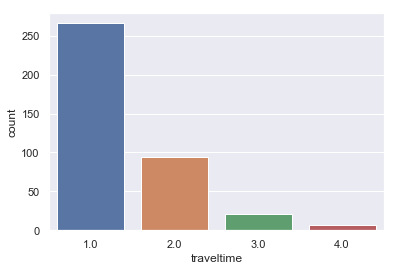

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [51]:
replace_nan_by_mode('traveltime')

Столбец  studytime
--------------
Кол-во уникальных значений 4


2.0    189
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

В колонке всего 381 значений
В колонке всего 7 пропущенных значений


count    381.00000
mean       2.03937
std        0.84668
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        4.00000
Name: studytime, dtype: float64

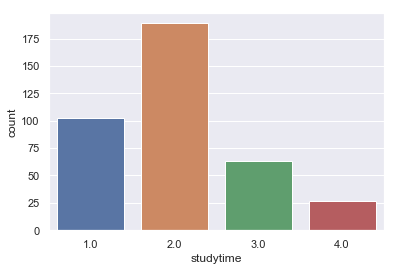

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,no_data,2.0,2.0,at_home,other,home,mother,1.0,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,no_data,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,4.0,90.0
227,GP,M,17,U,LE3,no_data,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,4.0,60.0
266,GP,M,17,U,GT3,no_data,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [52]:
basic_analysis (stud_math.columns[13])

Заполним пустые значения наиболее частовстречающимся значением

Столбец  studytime
--------------
Кол-во уникальных значений 4


2.0    196
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       2.038660
std        0.839004
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

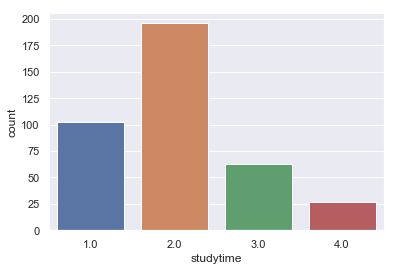

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [53]:
replace_nan_by_mode('studytime')

Столбец  failures
--------------
Кол-во уникальных значений 4


0.0    290
1.0     48
2.0     15
3.0     13
Name: failures, dtype: int64

В колонке всего 366 значений
В колонке всего 22 пропущенных значений


count    366.000000
mean       0.319672
std        0.716916
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

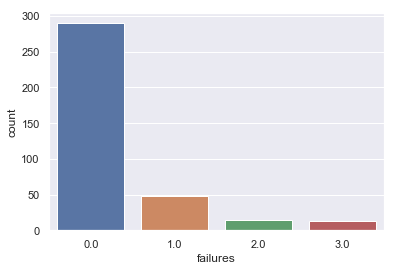

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,no_data,3.0,3.0,other,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,1.0,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,no_data,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,no_data,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [54]:
basic_analysis (stud_math.columns[14])

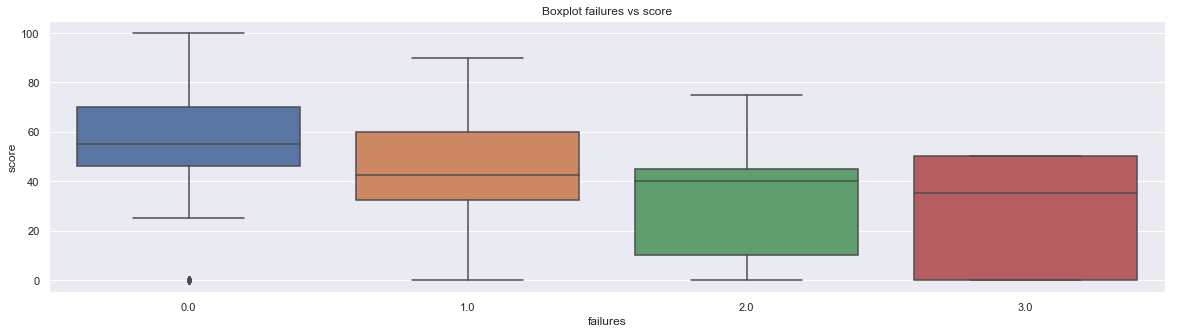

In [55]:
fig, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(x='failures',
            y='score',
            data=stud_math,
            ax=axes)
axes.set_title('Boxplot failures vs score')
plt.show()

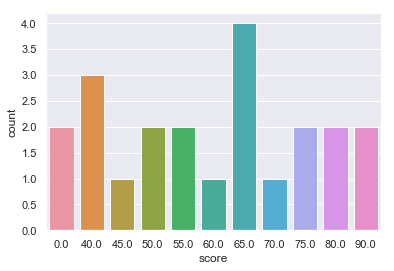

In [56]:
sns.countplot(x='score', data=stud_math.loc[stud_math.failures.isna()])

Как видно из описания под 0 может пониматься как отсутствие провалов, так и >4 провалов. У тех, для кого отсутствуют данные failures представлены студенты с совершенно разным кол-вом баллов, поэтому лучше заменить failures на какое-либо другое значение  или удалить (таким образом будет удалено 6% выборки)

Попробуем заменить на -1

In [57]:
stud_math.failures.fillna(-1, inplace=True)

Столбец  schoolsup
--------------
Кол-во уникальных значений 2


no     330
yes     49
Name: schoolsup, dtype: int64

В колонке всего 379 значений
В колонке всего 9 пропущенных значений


count     379
unique      2
top        no
freq      330
Name: schoolsup, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,no_data,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,home,father,1.0,1.0,0.0,NaN,no,no,no,yes,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


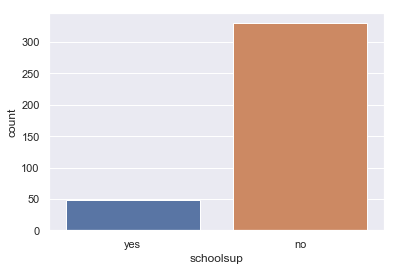

In [58]:
basic_analysis (stud_math.columns[15])

Проверим, связано ли наличие поддержки с результатами (score)

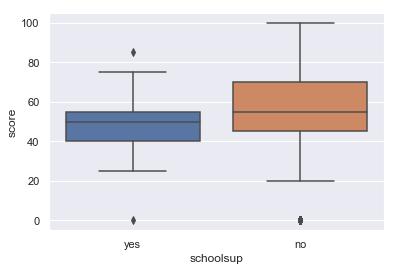

In [59]:
sns.boxplot(x='schoolsup', y='score', data=stud_math)

Поскольку очевидной связи не прослеживается, заменим пустые значения на наиболее частовстречающееся

Столбец  schoolsup
--------------
Кол-во уникальных значений 2


no     339
yes     49
Name: schoolsup, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top        no
freq      339
Name: schoolsup, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


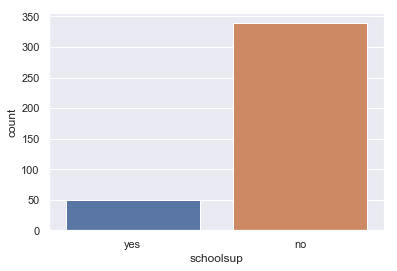

In [60]:
replace_nan_by_mode('schoolsup')

Столбец  famsup
--------------
Кол-во уникальных значений 2


yes    216
no     134
Name: famsup, dtype: int64

В колонке всего 350 значений
В колонке всего 38 пропущенных значений


count     350
unique      2
top       yes
freq      216
Name: famsup, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,no_data,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,other,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


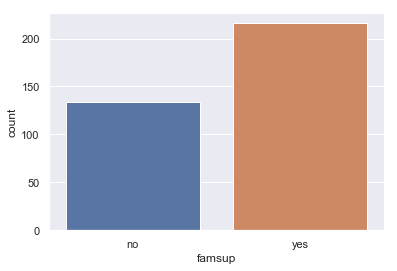

In [61]:
basic_analysis (stud_math.columns[16])

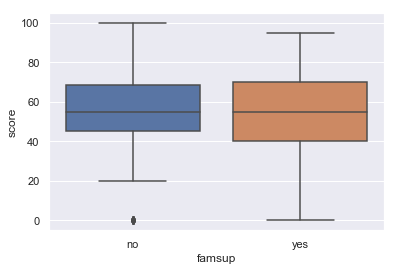

In [62]:
sns.boxplot(x='famsup', y='score', data=stud_math)

Поскольку очевидной связи не прослеживается, заменим пустые значения на наиболее частовстречающееся

Столбец  famsup
--------------
Кол-во уникальных значений 2


yes    254
no     134
Name: famsup, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top       yes
freq      254
Name: famsup, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


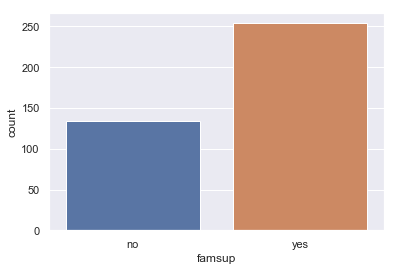

In [63]:
replace_nan_by_mode('famsup')

Столбец  paid
--------------
Кол-во уникальных значений 2


no     196
yes    153
Name: paid, dtype: int64

В колонке всего 349 значений
В колонке всего 39 пропущенных значений


count     349
unique      2
top        no
freq      196
Name: paid, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,-1.0,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,1.0,2.0,-1.0,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,no_data,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


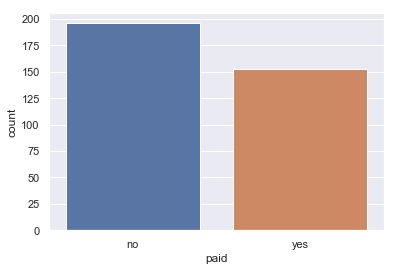

In [64]:
basic_analysis (stud_math.columns[17])

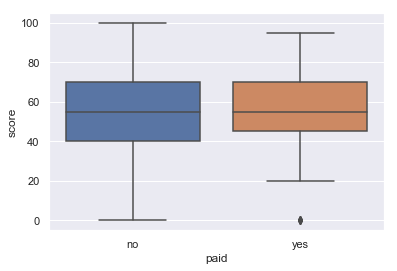

In [65]:
sns.boxplot(x='paid', y='score', data=stud_math)

Как видно из boxplot связи между paid и score не прослеживается, поэтому можно заменить отсутствующие значения на моду

Столбец  paid
--------------
Кол-во уникальных значений 2


no     235
yes    153
Name: paid, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top        no
freq      235
Name: paid, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


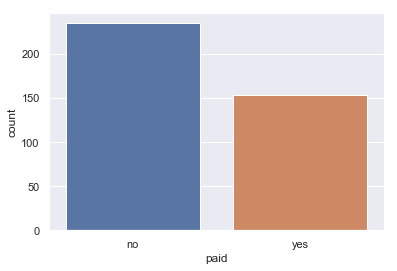

In [66]:
replace_nan_by_mode('paid')

Столбец  activities
--------------
Кол-во уникальных значений 2


yes    192
no     182
Name: activities, dtype: int64

В колонке всего 374 значений
В колонке всего 14 пропущенных значений


count     374
unique      2
top       yes
freq      192
Name: activities, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,no_data,3.0,3.0,other,other,other,mother,1.0,1.0,-1.0,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,no_data,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,no,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,2.0,2.0,0.0,no,yes,no,NaN,yes,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,home,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,2.0,no,no,no,NaN,yes,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0


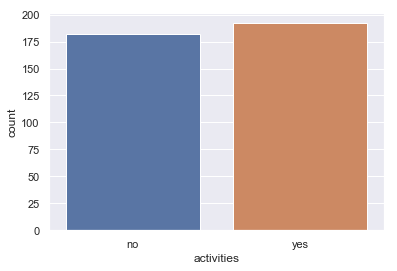

In [67]:
basic_analysis (stud_math.columns[18])

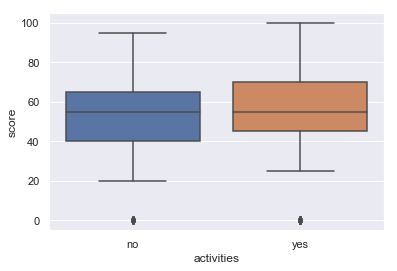

In [68]:
sns.boxplot(x='activities', y='score', data=stud_math)

С переменной activities аналогичная ситуация (как и с переменной paid). Связь не прослеживается, заменим пустые  значения на моду

Столбец  activities
--------------
Кол-во уникальных значений 2


yes    206
no     182
Name: activities, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top       yes
freq      206
Name: activities, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


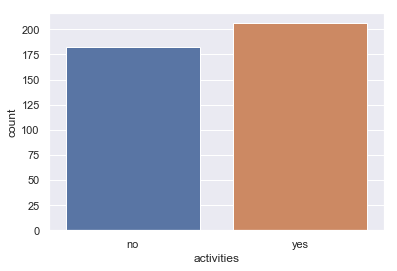

In [69]:
replace_nan_by_mode('activities')

Столбец  nursery
--------------
Кол-во уникальных значений 2


yes    297
no      76
Name: nursery, dtype: int64

В колонке всего 373 значений
В колонке всего 15 пропущенных значений


count     373
unique      2
top       yes
freq      297
Name: nursery, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,no_data,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,NaN,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,yes,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,no,no,no,yes,NaN,yes,yes,no,5.0,3.0,4.0,4.0,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0


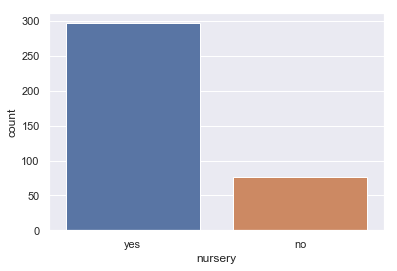

In [70]:
basic_analysis (stud_math.columns[19])

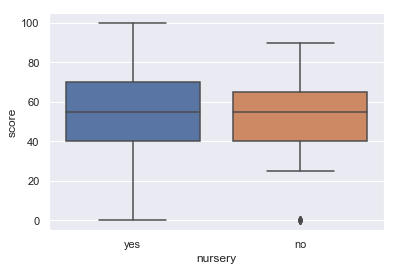

In [71]:
sns.boxplot(x='nursery', y='score', data=stud_math)

Связь с переменной score не прослеживается, заменим  на моду

Столбец  nursery
--------------
Кол-во уникальных значений 2


yes    312
no      76
Name: nursery, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top       yes
freq      312
Name: nursery, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


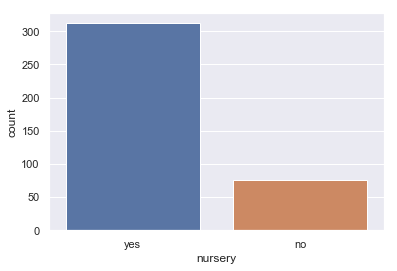

In [72]:
replace_nan_by_mode('nursery')

Столбец  higher
--------------
Кол-во уникальных значений 2


yes    350
no      18
Name: higher, dtype: int64

В колонке всего 368 значений
В колонке всего 20 пропущенных значений


count     368
unique      2
top       yes
freq      350
Name: higher, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,-1.0,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,no_data,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,U,GT3,no_data,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,no,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,GP,M,15,U,LE3,no_data,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,yes,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,GP,M,16,R,GT3,no_data,2.0,2.0,at_home,other,course,mother,3.0,1.0,-1.0,no,no,no,no,no,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,-1.0,no,yes,no,yes,no,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,-1.0,no,yes,yes,yes,yes,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


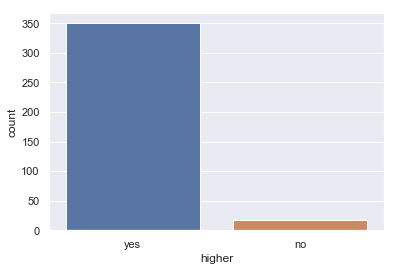

In [73]:
basic_analysis (stud_math.columns[20])

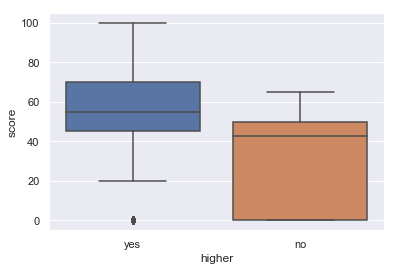

In [74]:
sns.boxplot(x='higher', y='score', data=stud_math)

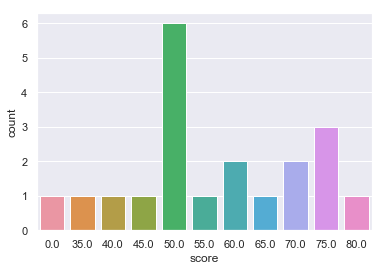

In [75]:
sns.countplot(x='score', data=stud_math.loc[stud_math.higher.isna()])


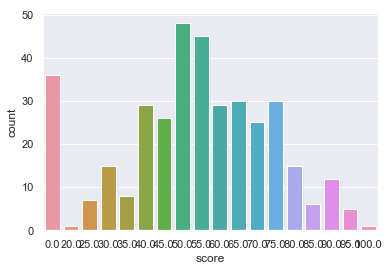

In [76]:
sns.countplot(x='score', data=stud_math.loc[~stud_math.higher.isna()])


Однозначно заменить higher на основе score не получается, выделим неизвестные в одтельную категорию -1, чтобы не исказить результат

In [77]:
stud_math.higher.fillna(-1, inplace=True)

Столбец  internet
--------------
Кол-во уникальных значений 2


yes    299
no      55
Name: internet, dtype: int64

В колонке всего 354 значений
В колонке всего 34 пропущенных значений


count     354
unique      2
top       yes
freq      299
Name: internet, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,no_data,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,course,father,1.0,1.0,0.0,yes,yes,yes,yes,no,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,GP,F,16,U,LE3,T,2.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,-1.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,home,father,2.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


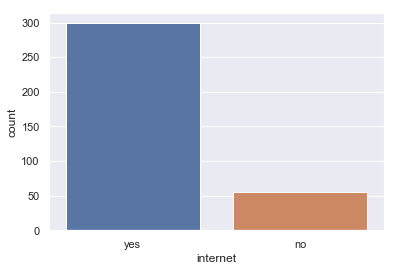

In [78]:
basic_analysis (stud_math.columns[21])

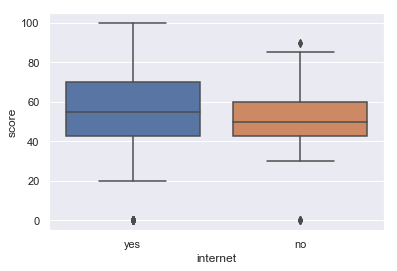

In [79]:
sns.boxplot(x='internet', y='score', data=stud_math)

Заменим пустые значения на моду

Столбец  internet
--------------
Кол-во уникальных значений 2


yes    333
no      55
Name: internet, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top       yes
freq      333
Name: internet, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


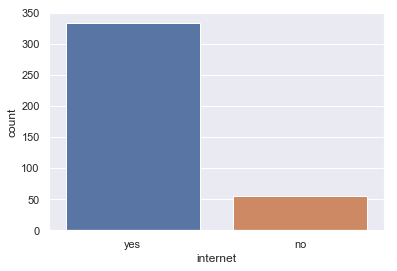

In [80]:
replace_nan_by_mode('internet')

Столбец  romantic
--------------
Кол-во уникальных значений 2


no     235
yes    122
Name: romantic, dtype: int64

В колонке всего 357 значений
В колонке всего 31 пропущенных значений


count     357
unique      2
top        no
freq      235
Name: romantic, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
13,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,no,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,mother,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
54,GP,F,15,U,LE3,no_data,3.0,3.0,other,other,other,mother,1.0,1.0,-1.0,no,no,yes,yes,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
67,GP,F,16,U,GT3,no_data,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
75,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
112,GP,F,16,U,GT3,no_data,2.0,2.0,at_home,other,home,mother,1.0,2.0,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0


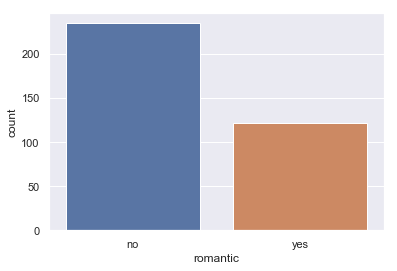

In [81]:
basic_analysis (stud_math.columns[22])

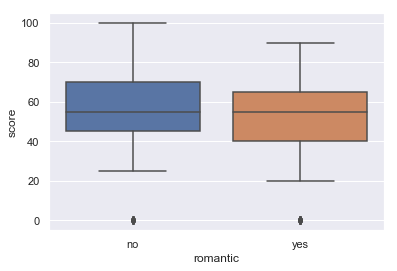

In [82]:
sns.boxplot(x='romantic', y='score', data=stud_math)

Заменим пустые значения на моду

Столбец  romantic
--------------
Кол-во уникальных значений 2


no     266
yes    122
Name: romantic, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count     388
unique      2
top        no
freq      266
Name: romantic, dtype: object

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


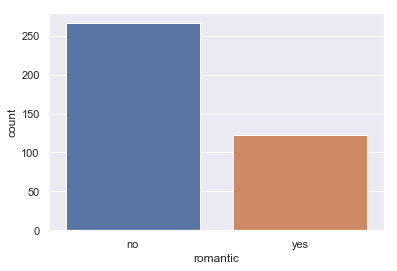

In [83]:
replace_nan_by_mode('romantic')

Столбец  famrel
--------------
Кол-во уникальных значений 6


 4.0    178
 5.0     96
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

В колонке всего 361 значений
В колонке всего 27 пропущенных значений


count    361.000000
mean       3.927978
std        0.931139
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

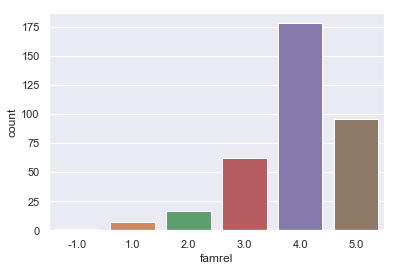

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,yes,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,yes,no,NaN,2.0,4.0,5.0,20.0,40.0


In [84]:
basic_analysis (stud_math.columns[23])

Значение -1 отсутствует в описании df. Предположим, что -1 является опечаткой, заменим на 1

In [85]:
stud_math.loc[stud_math.famrel == -1, 'famrel'] = 1

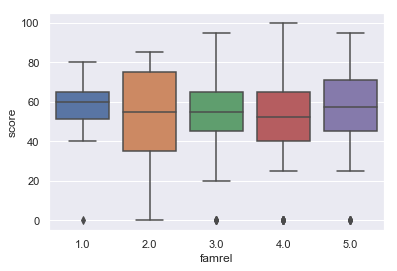

In [86]:
sns.boxplot(x='famrel', y='score', data=stud_math)

Заменим на медиану пустые значение

Столбец  famrel
--------------
Кол-во уникальных значений 5


4.0    205
5.0     96
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       3.938144
std        0.875323
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

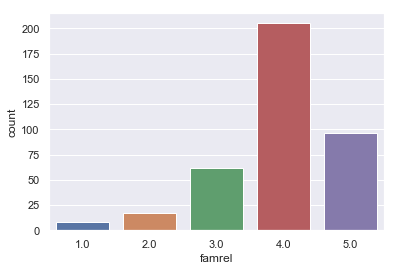

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [87]:
replace_nan_by_mode('famrel')

Столбец  freetime
--------------
Кол-во уникальных значений 5


3.0    152
4.0    109
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

В колонке всего 379 значений
В колонке всего 9 пропущенных значений


count    379.000000
mean       3.221636
std        0.993874
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

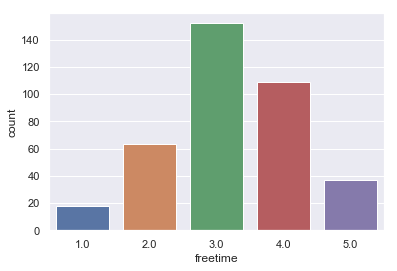

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,no_data,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,no_data,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
280,GP,M,17,U,no_data,A,4.0,NaN,services,other,home,mother,2.0,1.0,-1.0,no,no,yes,yes,yes,yes,yes,no,4.0,NaN,4.0,5.0,30.0,40.0
290,GP,M,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,other,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,2.0,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0
338,GP,F,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0


In [88]:
basic_analysis (stud_math.columns[24])

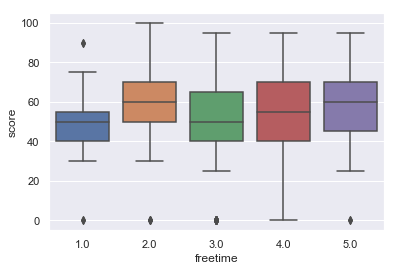

In [89]:
sns.boxplot(x='freetime', y='score', data=stud_math)

Заменим на моду

Столбец  freetime
--------------
Кол-во уникальных значений 5


3.0    161
4.0    109
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       3.216495
std        0.982817
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

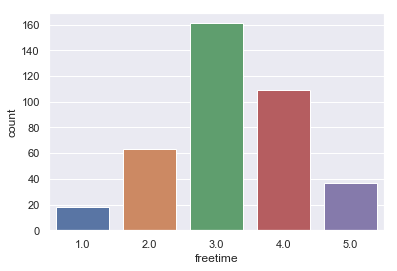

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [90]:
replace_nan_by_mode('freetime')

Столбец  goout
--------------
Кол-во уникальных значений 5


3.0    126
2.0    101
4.0     81
5.0     50
1.0     23
Name: goout, dtype: int64

В колонке всего 381 значений
В колонке всего 7 пропущенных значений


count    381.000000
mean       3.089239
std        1.113276
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

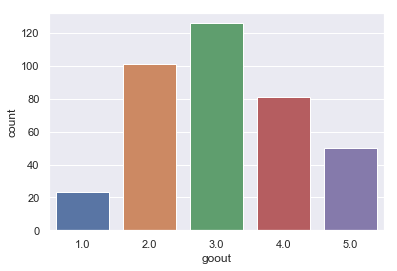

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,U,LE3,T,2.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,no_data,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,no_data,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
241,GP,M,17,U,LE3,A,4.0,4.0,teacher,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


In [91]:
basic_analysis (stud_math.columns[25])

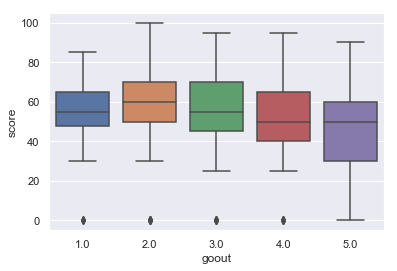

In [92]:
sns.boxplot(x='goout', y='score', data=stud_math)

Заменим на моду

Столбец  goout
--------------
Кол-во уникальных значений 5


3.0    133
2.0    101
4.0     81
5.0     50
1.0     23
Name: goout, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       3.087629
std        1.103226
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

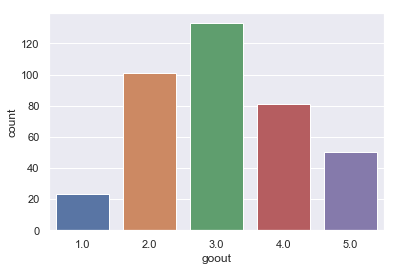

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [93]:
replace_nan_by_mode('goout')

Столбец  health
--------------
Кол-во уникальных значений 5


5.0    137
3.0     88
4.0     60
1.0     46
2.0     42
Name: health, dtype: int64

В колонке всего 373 значений
В колонке всего 15 пропущенных значений


count    373.000000
mean       3.536193
std        1.397734
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

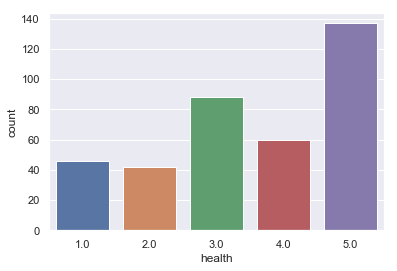

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,yes,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,other,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,no_data,3.0,2.0,services,at_home,home,mother,1.0,1.0,-1.0,no,yes,no,no,yes,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,NaN,other,other,home,father,1.0,2.0,-1.0,no,no,no,yes,no,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0


In [94]:
basic_analysis (stud_math.columns[26])

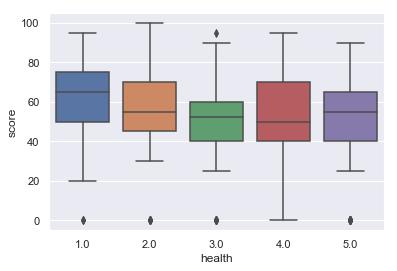

In [95]:
sns.boxplot(x='health', y='score', data=stud_math)

Заменим на моду

Столбец  health
--------------
Кол-во уникальных значений 5


5.0    152
3.0     88
4.0     60
1.0     46
2.0     42
Name: health, dtype: int64

В колонке всего 388 значений
В колонке всего 0 пропущенных значений


count    388.000000
mean       3.592784
std        1.399206
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

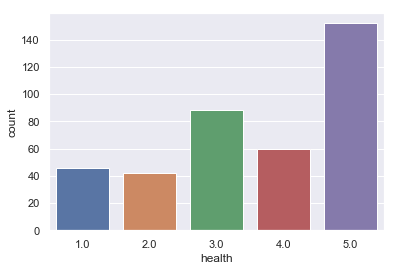

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [96]:
replace_nan_by_mode('health')

# Корреляционный анализ количественных переменных

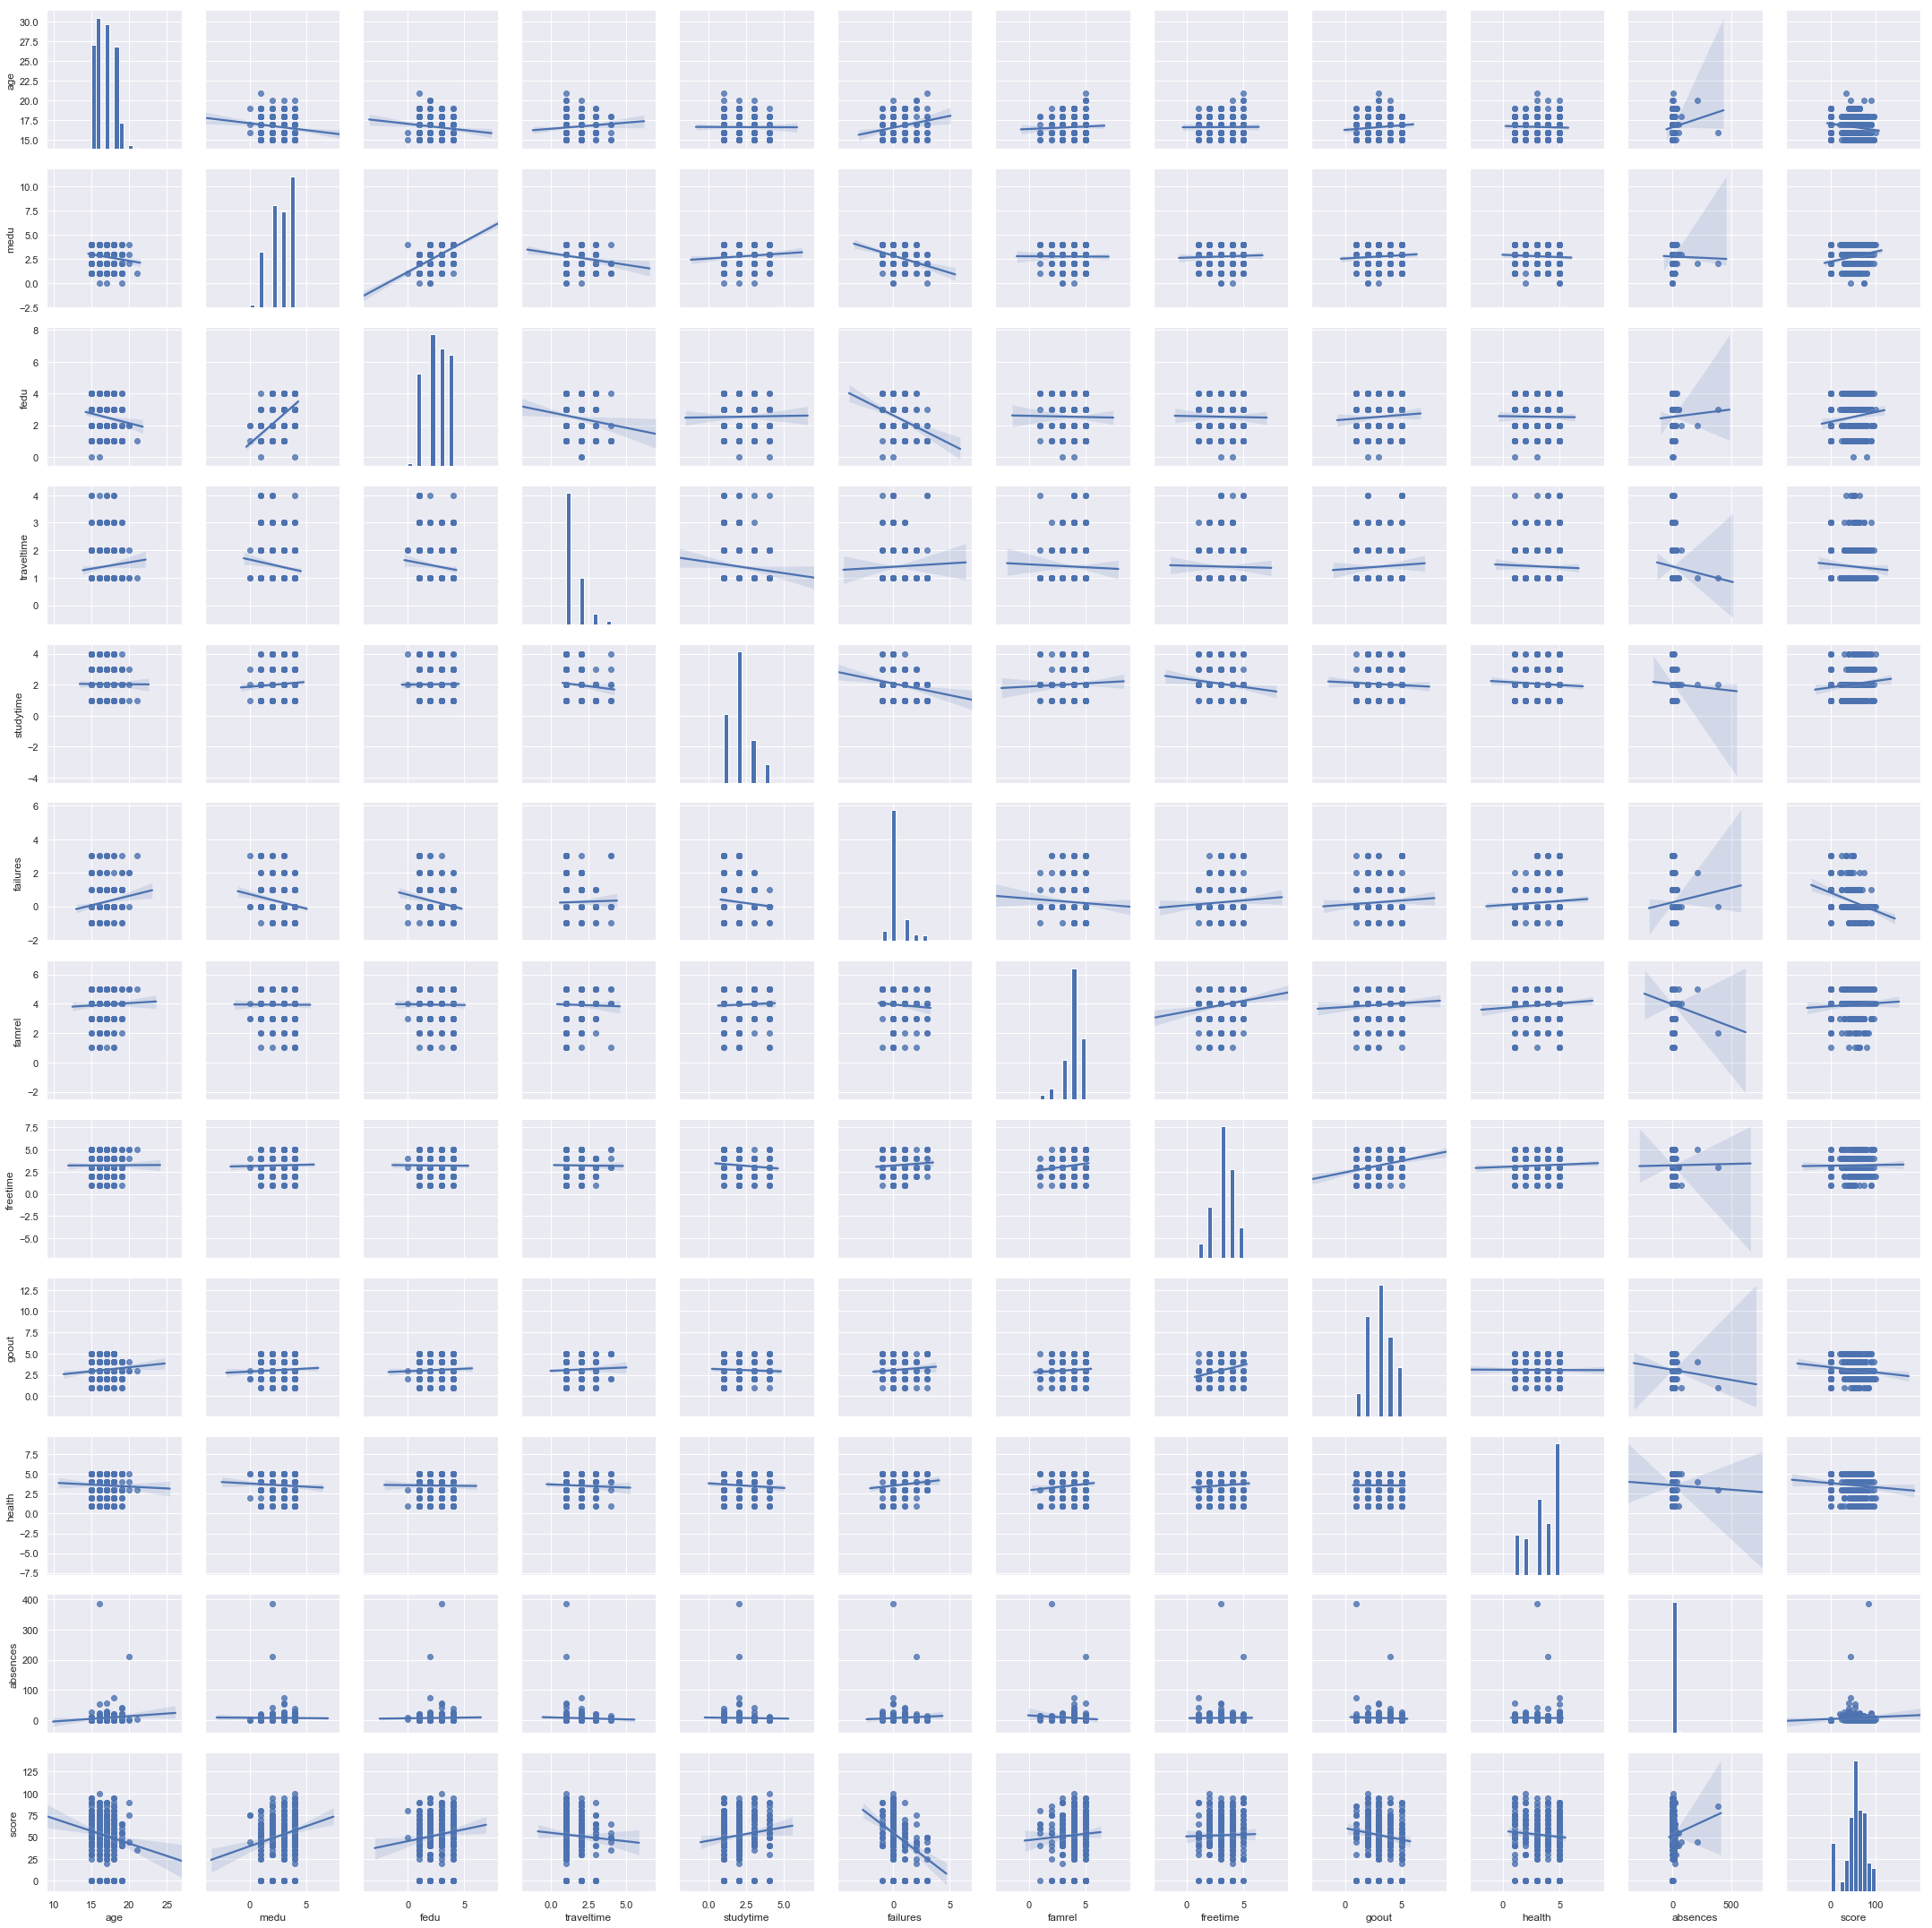

In [97]:
sns.pairplot(stud_math, kind = 'reg')

In [98]:
numeric_variables_corr = stud_math[['score', 'age', 'absences']].corr()
numeric_variables_corr

,score,age,absences
score,1.000000,-0.153518,0.063198
age,-0.153518,1.000000,0.093561
absences,0.063198,0.093561,1.000000


In [99]:
all_variavles_corr = stud_math.corr()
all_variavles_corr

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.153370,-0.139745,0.084493,-0.004719,0.182058,0.044914,0.005474,0.105132,-0.042892,0.093561,-0.153518
medu,-0.153370,1.000000,0.625562,-0.149348,0.080479,-0.247142,-0.004567,0.033483,0.068716,-0.061619,-0.011996,0.217588
fedu,-0.139745,0.625562,1.000000,-0.123297,0.012523,-0.250031,-0.012195,-0.012590,0.057756,-0.013106,0.020532,0.129232
traveltime,0.084493,-0.149348,-0.123297,1.000000,-0.100371,0.027899,-0.027414,-0.015490,0.049260,-0.038362,-0.038135,-0.057407
studytime,-0.004719,0.080479,0.012523,-0.100371,1.000000,-0.136391,0.041968,-0.119855,-0.048336,-0.070198,-0.023657,0.112853
failures,0.182058,-0.247142,-0.250031,0.027899,-0.136391,1.000000,-0.062599,0.074111,0.072930,0.089102,0.053016,-0.327084
famrel,0.044914,-0.004567,-0.012195,-0.027414,0.041968,-0.062599,1.000000,0.162785,0.064495,0.099639,-0.081190,0.054697
freetime,0.005474,0.033483,-0.012590,-0.015490,-0.119855,0.074111,0.162785,1.000000,0.292268,0.071791,0.007432,0.018603
goout,0.105132,0.068716,0.057756,0.049260,-0.048336,0.072930,0.064495,0.292268,1.000000,-0.006955,-0.050533,-0.125889
health,-0.042892,-0.061619,-0.013106,-0.038362,-0.070198,0.089102,0.099639,0.071791,-0.006955,1.000000,-0.019000,-0.083528


## Выводы

#### Корреляция с числовой переменной age
При рассмотрении числовых переменных наблюдается только слабая корреляция между score и age
Корреляция отрицательная = -0.15 и очень слабая (см.таблицы Чеддока). То есть чем старше ученик, тем слабее его математические успехи.

### По результатам корреляционного анализа всех переменных
наибольший коэффициент корреляции (> |0.3|) имеет следующая переменная:
1. failures (отрицательная корреляция)
    - то есть чем выше кол-во внеучебных неудач, тем ниже балл по математик
Согласно таблицам Чеддока данный коэффициент корреляции является  слабым 

### Очень слабая корреляций (|0.1|-|0.2|) прослеживается у переменных:
1. medu (положительная корреляция) 
    - то есть чем выше уровень образования матери, тем выше оценка ученика по математике
2. fedu (положительная корреляция) 
3. studytime (положительная корреляция) 
4. goout (отрицательная корреляция) 

### Коэффициент корреляциия менее |0.1| у переменных:
1. traveltime
2. famrel
3. freetime
4. health
5. absences

Их можно исключить из модели

# Анализ номинативных переменных

Посмотрим на боксплоты

In [100]:
def boxplot(column):

    fig = plt.figure()
    fig, axes = plt.subplots(figsize=(6, 4))
    sns.boxplot(x=column,
                y='score',
                data=stud_math,
                ax=axes)
    axes.set_title('Boxplot for '+ column)
    plt.xticks()
    plt.show()

<Figure size 432x288 with 0 Axes>

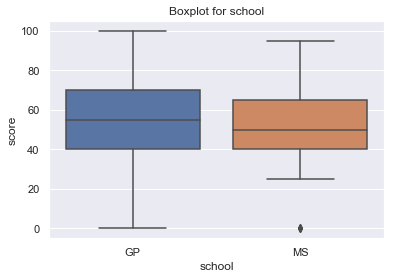

<Figure size 432x288 with 0 Axes>

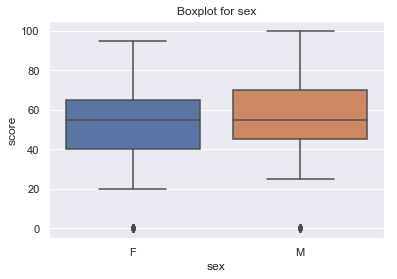

<Figure size 432x288 with 0 Axes>

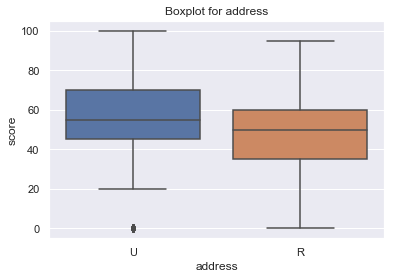

<Figure size 432x288 with 0 Axes>

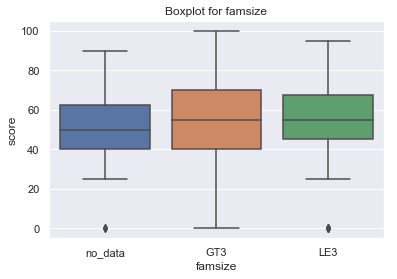

<Figure size 432x288 with 0 Axes>

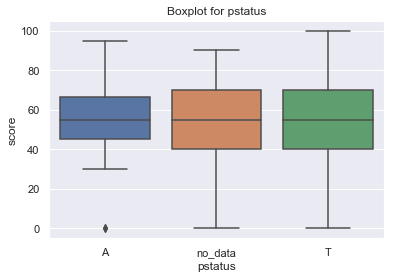

<Figure size 432x288 with 0 Axes>

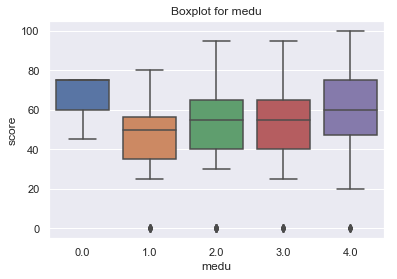

<Figure size 432x288 with 0 Axes>

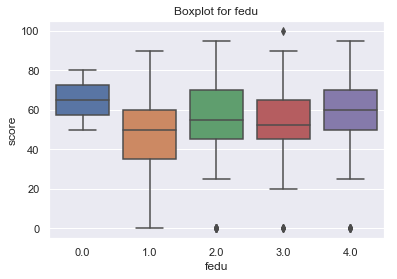

<Figure size 432x288 with 0 Axes>

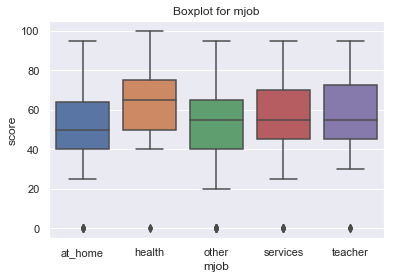

<Figure size 432x288 with 0 Axes>

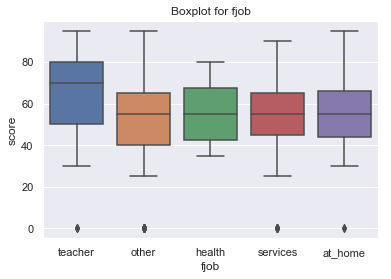

<Figure size 432x288 with 0 Axes>

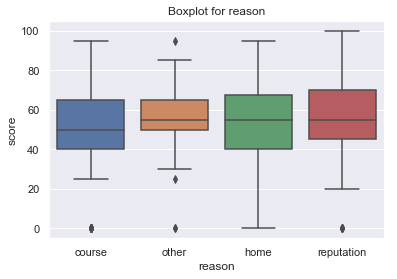

<Figure size 432x288 with 0 Axes>

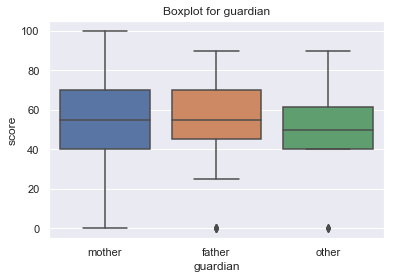

<Figure size 432x288 with 0 Axes>

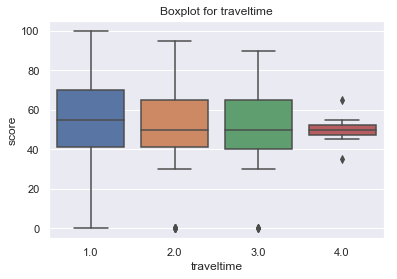

<Figure size 432x288 with 0 Axes>

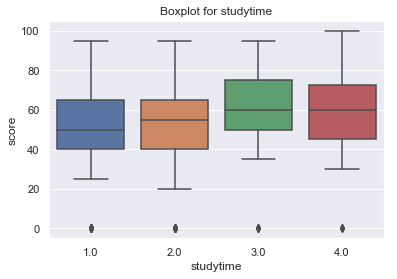

<Figure size 432x288 with 0 Axes>

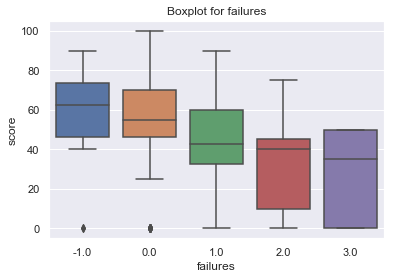

<Figure size 432x288 with 0 Axes>

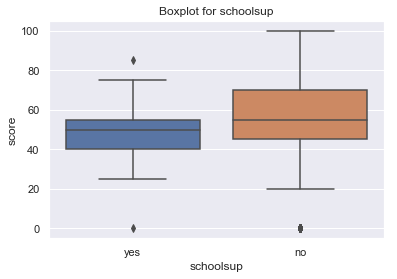

<Figure size 432x288 with 0 Axes>

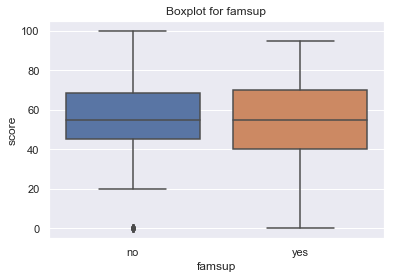

<Figure size 432x288 with 0 Axes>

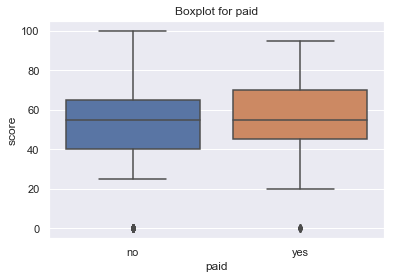

<Figure size 432x288 with 0 Axes>

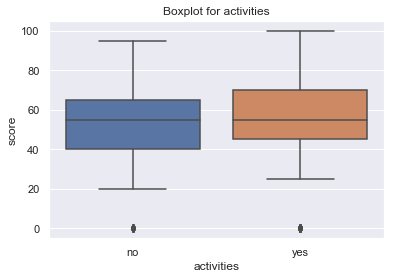

<Figure size 432x288 with 0 Axes>

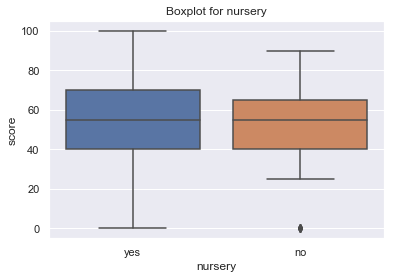

<Figure size 432x288 with 0 Axes>

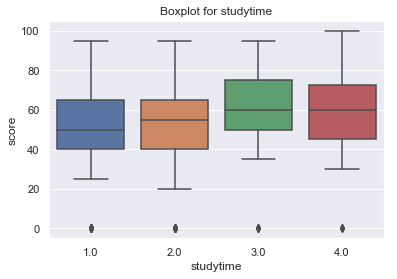

<Figure size 432x288 with 0 Axes>

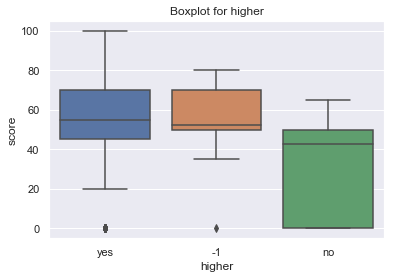

<Figure size 432x288 with 0 Axes>

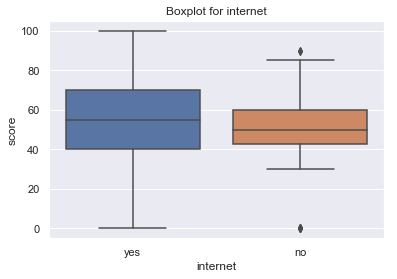

<Figure size 432x288 with 0 Axes>

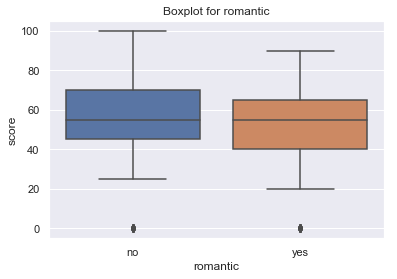

<Figure size 432x288 with 0 Axes>

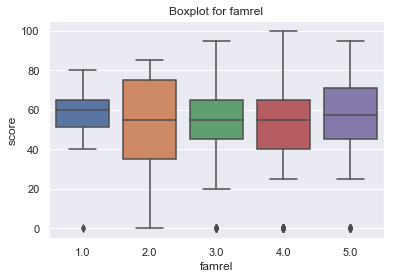

<Figure size 432x288 with 0 Axes>

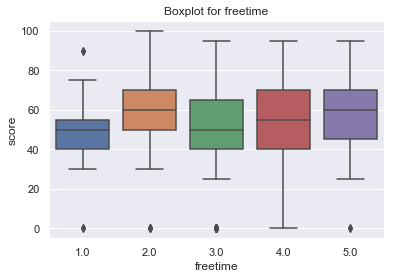

<Figure size 432x288 with 0 Axes>

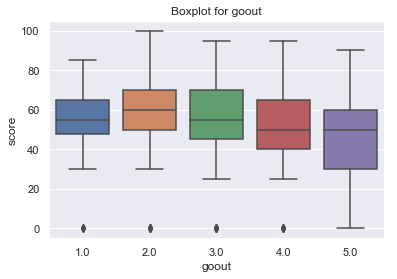

<Figure size 432x288 with 0 Axes>

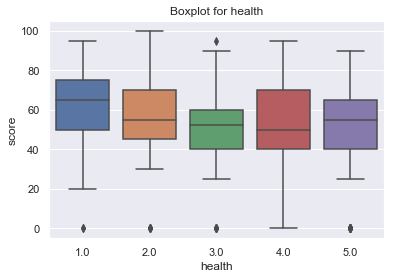

In [101]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime', 'higher' , 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    boxplot(col)

Проверим номинативные переменные с использованием простого T-теста

In [106]:
def nominative_stats(column):
    cols =  stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # поправка Бонферрони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [103]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime', 'higher' , 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    nominative_stats(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Результаты

Основываясь на результатах корреляционного анализа включим  в модель столбец:
-  age

Основываясь на т-тесте включим в модель столбцы: 
- sex 
- address 
- medu 
- mjob 
- failures 
- higher 
- romantic

В столбец goout в итоге не найдено статистически значимых различий.

В итоге таблица для модели будет иметь следующий вид

In [104]:
for_model = stud_math[['age', 'sex', 'address', 'medu', 'mjob', 'failures', 'higher', 'romantic']]
for_model.head()

,age,sex,address,medu,mjob,failures,higher,romantic
0,18,F,U,4.0,at_home,0.0,yes,no
1,17,F,U,1.0,at_home,0.0,yes,no
2,15,F,U,1.0,at_home,3.0,yes,no
3,15,F,U,4.0,health,0.0,yes,yes
4,16,F,U,3.0,other,0.0,yes,no
